# 6. Probability

## 6.1 종속성과 독립성

pass

## 6.2 조건부 확률

코드가 재밌어서 기록. 사건이 일어난 횟수 기반으로 계산했다.

- `P(both | older)` : 첫째가 여자일 때, 자매 모두 여자일 확률
- `P(both | either)` : 자매 중 최소 1명이 여자일 때, 자매 모두 여자일 확률

In [1]:
import random

def random_kid():
    return random.choice(["boy", "girl"])

In [2]:
both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)
for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == "girl":
        older_girl += 1
    if older == "girl" and younger == "girl":
        both_girls += 1
    if older == "girl" or younger == "girl":
        either_girl += 1

print ("P(both | older):", both_girls / older_girl)
print ("P(both | either): ", both_girls / either_girl)

P(both | older): 0.5007089325501317
P(both | either):  0.3311897106109325


## 6.3 베이즈 정리

pass

## 6.4 확률

### 6.4.1 확률변수(random variable)

$$
X(ω):ω\rightarrow x \\
P(X=x) = p
$$

> `ω`라는 sample이 `x`라는 숫자(스칼라 or 벡터)와 매칭된다.

> `X`라는 확률변수가 `p`의 확률로 `x`의 값을 가진다.

- 일정한 확률을 갖고 발생하는 사건(event)에 수치가 부여되는 변수. 일반적으로 대문자 `X`로 나타낸다.
- 확률변수 `X`의 구체적인 값은 소문자 `x`를 사용
- 만약 동전의 케이스이고, 앞면-뒷면을 H-T로 표현하고, 각각의 확률이 0.5라면 `P(X='H') = 0.5`로 표현할 수 있을 것

### 6.4.2 Probability Function

참고 링크 -> 데이터사이언스스쿨의 [확률모형이란](https://datascienceschool.net/view-notebook/56e7a25aad2a4539b3c31eb3eb787a54), [확률분포함수와 확률밀도함수의 차이](https://datascienceschool.net/view-notebook/4d74d1b5651245a7903583f30ae44608/), 스택오버플로우의 [user132704 답변 부분](https://math.stackexchange.com/questions/175850/difference-between-probability-density-function-and-probability-distribution)

- 시작은 **Continuous random variable**부터 한다.
    + 어떤 연속적인 값들, 예를 들어 시계 바늘이 가리키는 수치를 continuous random variable로 정하겠다.
    + 값은 0에서 360 미만까지이고, 15.5도, 20.4831도 등 연속적인 실수 값을 갖는다.
- 확률은 uniform distribution을 따를 때 특정 위치, 예를 들어 시계 바늘이 **1을 정확하게 가리킬 확률은 0**이다. 확률 1을 모든 variable의 개수로 나눠야하는지 무한대로 나누기 때문에 0이다.
- 그래서 Continuous random variable의 Probability distribution을 설명하려면 **구간 정보(시작, 끝 값)** 가 필요하다. ex) 1에서 2 사이일 확률, 5에서 7 사이의 확률 등
- 여기서 두 개의 값을 사용하는 것이 아니라, 시작 값을 특정 값을 고정해서 끝 값만 사용해서 구간 확률을 계산하고, 그를 표현한 것이 **Cumulative distribution function**, **CDF**다
    + 일반적으로 시작 값을 음의 무한대로 설정하고
    + 대문자 **F**로 함수를 표현한다. F(x)는 x가 끝 값인 CDF의 값이다.
    + $F(x)=P({X<x})=P(X<x)$

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/ca/Normal_Distribution_CDF.svg/600px-Normal_Distribution_CDF.svg.png" width="450">


- 다만 CDF의 단점은 특정 값의 확률을 표현할 수 없다. 우리가 주로 알고싶어하는 정보를 알기가 어렵다. 그래서 이 CDF의 지점을 미분해서 그 기울기 값을 그래프로 표현하게 되는데 이것이 **Probability Density Function**, **PDF**다.
    + -무한대에서 +무한대까지 PDF의 값들을 적분하면 값은 1이된다.(전체 확률이 1)
    + PDF의 값은 0이상이다. 음수일 수 없다(확률이므로)
- Gaussian PDF

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Normal_Distribution_PDF.svg/720px-Normal_Distribution_PDF.svg.png" width="450">

- PMF: Probability Mass Function

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/85/Discrete_probability_distrib.svg/440px-Discrete_probability_distrib.svg.png" width="450">

## 6.5 Continuous distribution

위에서 따로 정리했으므로 pass

## 6.6 Normal distribution

Gaussian Density Function으로 표현되는 분포. parameter가 $\mu$(평균), $\sigma^2$(분산) 2개 존재

![gaussian-density](https://wikimedia.org/api/rest_v1/media/math/render/svg/ffe7c5cbdecda556bf2170e31f1f9a127b74e239)

## 6.7 Central limit theorem

중심극한정리(CLT): 동일한 확률분포를 가진 독립 확률 변수 n개의 평균의 분포는 n이 적당히 크다면 정규분포에 가까워진다

In [3]:
from collections import Counter
import matplotlib.pyplot as plt
import math

def bernoulli_trial(p):
    return 1 if random.random() < p else 0

def binomial(p, n):
    return sum(bernoulli_trial(p) for _ in range(n))

def normal_cdf(x, mu=0,sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

def make_hist(p, n, num_points):
    
    data = [binomial(p, n) for _ in range(num_points)]
    
    # use a bar chart to show the actual binomial samples
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
            [v / num_points for v in histogram.values()],
            0.8,
            color='0.75')
    
    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))

    # use a line chart to show the normal approximation
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma) 
          for i in xs]
    plt.plot(xs,ys)
    plt.show()

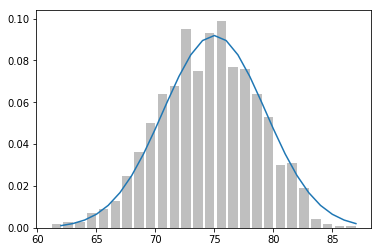

In [4]:
make_hist(0.75,100,1000)

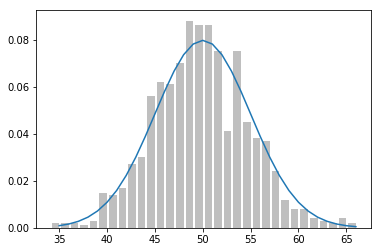

In [5]:
make_hist(0.50,100,1000)